In [1]:
import pandas as pd
import numpy as np

In [2]:
links_Data=pd.read_csv("links.csv")

In [3]:
links_Data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## There are 8 null values in tmdbId column


In [4]:
links_Data.isnull().sum()


movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [5]:
print("links data  shape : ",links_Data.shape)

links data  shape :  (9742, 3)


In [6]:
movies_Data=pd.read_csv("movies.csv")

In [7]:

print("movie data shape",movies_Data.shape)
movies_Data.head(10)

movie data shape (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## No null values  in movies dataset

In [8]:
movies_Data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
# merging movies and links 
link_and_Movie=pd.merge(links_Data,movies_Data,on='movieId')

In [10]:

print("link and Movie  data shape",link_and_Movie.shape)
link_and_Movie.head()

link and Movie  data shape (9742, 5)


,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


## Link and movie combined have only 8 null values in the tmdbId column

In [11]:
link_and_Movie.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
title      0
genres     0
dtype: int64

In [12]:
rating_Data = pd.read_csv("ratings.csv")

In [13]:
print("rating data shape",rating_Data.shape)
rating_Data.head()

rating data shape (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Rating data don't have any null values in any columns

In [14]:
rating_Data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
tags_Data=pd.read_csv("tags.csv")

In [16]:
print("Tags data shape",tags_Data.shape)
tags_Data.head()

Tags data shape (3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Tags data does not have any null values in any column

In [17]:
tags_Data.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [18]:
# merging movies and links 
rating_and_tag1=pd.merge(rating_Data,tags_Data)
rating_and_tag2=pd.merge(rating_Data,tags_Data, on=["userId"])
rating_and_tag3=pd.merge(rating_Data,tags_Data, how="left",on=["userId","movieId","timestamp"])
rating_and_tag4=pd.merge(rating_Data,tags_Data, how="right",on=["userId","movieId","timestamp"])
rating_and_tag5=pd.merge(rating_Data,tags_Data, how="outer",on=["userId","movieId","timestamp"])



In [19]:
print("default join",rating_and_tag1.shape)
print("inner with only user id",rating_and_tag2.shape)
print("left join ",rating_and_tag3.shape)
print("right join",rating_and_tag4.shape)
print("outer join",rating_and_tag5.shape)

default join (0, 5)
inner with only user id (4626866, 7)
left join  (100836, 5)
right join (3683, 5)
outer join (104519, 5)


In [20]:
print("********outer join ******")
print(rating_and_tag5.isnull().sum())

********outer join ******
userId            0
movieId           0
rating         3683
timestamp         0
tag          100836
dtype: int64


In [21]:
print("********right join ******")
print(rating_and_tag4.isnull().sum())

********right join ******
userId          0
movieId         0
rating       3683
timestamp       0
tag             0
dtype: int64


In [22]:
#going with the outer 
rating_and_tag = pd.merge(rating_Data,tags_Data, how="outer",on=["userId","movieId","timestamp"])

In [23]:
print("link and movie :",link_and_Movie.shape)
print("rating and tag :",rating_and_tag.shape)
print("link and movie unique attribute : ",link_and_Movie.movieId.unique())
print("rating and tag unique attribute : ",rating_and_tag.movieId.unique())
print("link and Movie info",)

link and movie : (9742, 5)
rating and tag : (104519, 5)
link and movie unique attribute :  [     1      2      3 ... 193585 193587 193609]
rating and tag unique attribute :  [    1     3     6 ... 32371 34482 85565]
link and Movie info


In [24]:
link_and_Movie.head(10)

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
5,6,113277,949.0,Heat (1995),Action|Crime|Thriller
6,7,114319,11860.0,Sabrina (1995),Comedy|Romance
7,8,112302,45325.0,Tom and Huck (1995),Adventure|Children
8,9,114576,9091.0,Sudden Death (1995),Action
9,10,113189,710.0,GoldenEye (1995),Action|Adventure|Thriller


In [25]:
print(rating_and_tag['movieId'] == 1)
rating_and_tag.head(10)


0          True
1         False
2         False
3         False
4         False
          ...  
104514    False
104515    False
104516    False
104517    False
104518    False
Name: movieId, Length: 104519, dtype: bool


,userId,movieId,rating,timestamp,tag
0,1,1,4.0,964982703,NaN
1,1,3,4.0,964981247,NaN
2,1,6,4.0,964982224,NaN
3,1,47,5.0,964983815,NaN
4,1,50,5.0,964982931,NaN
5,1,70,3.0,964982400,NaN
6,1,101,5.0,964980868,NaN
7,1,110,4.0,964982176,NaN
8,1,151,5.0,964984041,NaN
9,1,157,5.0,964984100,NaN


In [26]:
# merging both link,movie and rating,tag
final_Merge=pd.merge(link_and_Movie,rating_and_tag,on='movieId')


In [27]:
print("final merge :",final_Merge.shape)


final merge : (104519, 9)


In [28]:
print("********final merge ******")
print(final_Merge.isnull().sum())

********final merge ******
movieId           0
imdbId            0
tmdbId           13
title             0
genres            0
userId            0
rating         3683
timestamp         0
tag          100836
dtype: int64


In [29]:
print("final_Merge")
final_Merge.head(10)

final_Merge


,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN
5,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,NaN
6,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637,NaN
7,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878,NaN
8,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262,NaN
9,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616,NaN


## Exploratory data analysis on prepared Dataset

In [30]:
# Exploring data types of all columns 
data_Types=final_Merge.dtypes
print(data_Types)

movieId        int64
imdbId         int64
tmdbId       float64
title         object
genres        object
userId         int64
rating       float64
timestamp      int64
tag           object
dtype: object


In [31]:
eda_data=final_Merge.copy()
categorical_Features=[feature for feature in final_Merge.columns if eda_data[feature].dtypes=='O']
print("categorical features : ",categorical_Features)

categorical features :  ['title', 'genres', 'tag']


In [32]:
numerical_Features=[feature for feature in final_Merge.columns if eda_data[feature].dtypes!='O']
print("numerical features : ",numerical_Features)

numerical features :  ['movieId', 'imdbId', 'tmdbId', 'userId', 'rating', 'timestamp']


In [33]:
#counting the unique features of categorical data  
for feature in categorical_Features:
    print('The feature is {} and number of categories are {}'.format(feature,len(eda_data[feature].unique())))

The feature is title and number of categories are 9737
The feature is genres and number of categories are 951
The feature is tag and number of categories are 1590


In [34]:
#describing the data
final_Merge.describe(include='all')

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
count,104519.000000,1.045190e+05,104506.000000,104519,104519,104519.000000,100836.000000,1.045190e+05,3683
unique,NaN,NaN,NaN,9737,951,NaN,NaN,NaN,1589
top,NaN,NaN,NaN,Pulp Fiction (1994),Comedy,NaN,NaN,NaN,In Netflix queue
freq,NaN,NaN,NaN,488,7359,NaN,NaN,NaN,131
mean,19710.738191,3.559796e+05,20543.697395,NaN,NaN,329.828280,3.501557,1.209966e+09,NaN
std,35870.238985,6.297058e+05,54157.108637,NaN,NaN,182.849716,1.042529,2.158859e+08,NaN
min,1.000000,4.170000e+02,2.000000,NaN,NaN,1.000000,0.500000,8.281246e+08,NaN
25%,1200.000000,9.965300e+04,710.000000,NaN,NaN,177.000000,3.000000,1.026225e+09,NaN
50%,3022.000000,1.187990e+05,6964.000000,NaN,NaN,333.000000,3.500000,1.186163e+09,NaN
75%,8361.000000,3.172190e+05,11704.000000,NaN,NaN,477.000000,4.000000,1.439317e+09,NaN


In [35]:
final_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104519 entries, 0 to 104518
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    104519 non-null  int64  
 1   imdbId     104519 non-null  int64  
 2   tmdbId     104506 non-null  float64
 3   title      104519 non-null  object 
 4   genres     104519 non-null  object 
 5   userId     104519 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  104519 non-null  int64  
 8   tag        3683 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 8.0+ MB


# Q1. 1. Most frequently occuring values in categorical attributes

## Top 10 most frequent in title category

In [36]:
top_10 =10 
print(final_Merge['title'].value_counts()[:top_10])

Pulp Fiction (1994)                          488
Forrest Gump (1994)                          338
Shawshank Redemption, The (1994)             321
Silence of the Lambs, The (1991)             285
Matrix, The (1999)                           283
Star Wars: Episode IV - A New Hope (1977)    277
Fight Club (1999)                            272
Braveheart (1995)                            247
Jurassic Park (1993)                         239
Terminator 2: Judgment Day (1991)            232
Name: title, dtype: int64


## Top 10 most frequent in genres category

In [37]:
print(final_Merge['genres'].value_counts()[:top_10])

Comedy                              7359
Drama                               6649
Comedy|Romance                      4073
Comedy|Drama|Romance                3105
Drama|Romance                       2968
Comedy|Drama                        2931
Action|Adventure|Sci-Fi             2467
Crime|Drama                         2386
Action|Crime|Thriller               1585
Action|Adventure|Sci-Fi|Thriller    1473
Name: genres, dtype: int64


## Top 10 most frequent in tag category

In [38]:
print(final_Merge['tag'].value_counts()[:top_10])

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
Disney                23
surreal               23
religion              22
dark comedy           21
psychology            21
Name: tag, dtype: int64


# 2.Counting of NaN values per column

In [39]:
final_Merge.isna().sum()

movieId           0
imdbId            0
tmdbId           13
title             0
genres            0
userId            0
rating         3683
timestamp         0
tag          100836
dtype: int64

## counting unique values for each column

In [40]:
# counting unique values in each column 
unique_Values=final_Merge.nunique()
print(unique_Values)

movieId       9742
imdbId        9742
tmdbId        9733
title         9737
genres         951
userId         610
rating          10
timestamp    88453
tag           1589
dtype: int64


In [41]:
final_Merge.isna().sum()

movieId           0
imdbId            0
tmdbId           13
title             0
genres            0
userId            0
rating         3683
timestamp         0
tag          100836
dtype: int64

In [42]:
final_Merge['tag'].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
Chris Klein            1
dumb                   1
Jason Biggs            1
not funny              1
remaster               1
Name: tag, Length: 1589, dtype: int64

## fix the NaN values. for rating we'll populate them with mean if movie has already been rated by another user. 


In [43]:
counter=0
for row in final_Merge['rating']:
    if np.isnan(row):
        movie_name=final_Merge['title'].iloc[counter]
        counter2=0
        rating=0
        total=1
        for row2 in final_Merge['title']:
            if row2==movie_name:
                rating=rating+final_Merge['rating'].iloc[counter2]
                total=total+1
            rating=rating/total
            rating=round(rating * 2) / 2
        counter2=counter2+1
        
        final_Merge['rating'].iloc[counter]=rating
    counter=counter+1
                
                
                
        
        
        
  
            
        

c:\users\udit kumar\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
final_Merge.isna().sum()

movieId           0
imdbId            0
tmdbId           13
title             0
genres            0
userId            0
rating            0
timestamp         0
tag          100836
dtype: int64

## remove 13 rows of tmdbid

In [45]:
final_Merge= final_Merge[final_Merge['tmdbId'].notna()]

In [46]:
final_Merge.isna().sum()

movieId           0
imdbId            0
tmdbId            0
title             0
genres            0
userId            0
rating            0
timestamp         0
tag          100823
dtype: int64

In [47]:
final_Merge['tag'].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
Chris Klein            1
dumb                   1
Jason Biggs            1
not funny              1
remaster               1
Name: tag, Length: 1589, dtype: int64

# 3.Plotting Correlations between features

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

            movieId    imdbId    tmdbId    userId    rating  timestamp
movieId    1.000000  0.860243  0.746341 -0.001475 -0.024783   0.500826
imdbId     0.860243  1.000000  0.834988 -0.008620 -0.026071   0.410918
tmdbId     0.746341  0.834988  1.000000 -0.001941 -0.041816   0.293208
userId    -0.001475 -0.008620 -0.001941  1.000000 -0.097364   0.097763
rating    -0.024783 -0.026071 -0.041816 -0.097364  1.000000  -0.056785
timestamp  0.500826  0.410918  0.293208  0.097763 -0.056785   1.000000


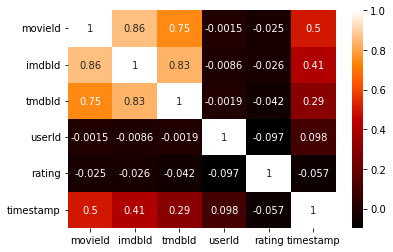

In [49]:

print(final_Merge.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(final_Merge.corr(),cmap='gist_heat', annot=True)
  
# displaying heatmap
plt.show()

In [50]:
copy_data=final_Merge.copy()

In [51]:
copy_data

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN
...,...,...,...,...,...,...,...,...,...
104514,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,NaN
104515,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,NaN
104516,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805,NaN
104517,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,NaN


In [52]:
copy_data=copy_data[['userId','title','rating']]

In [53]:
copy_data=copy_data.drop_duplicates(['userId','title'])

In [54]:
copy_data

,userId,title,rating
0,1,Toy Story (1995),4.0
1,5,Toy Story (1995),4.0
2,7,Toy Story (1995),4.5
3,15,Toy Story (1995),2.5
4,17,Toy Story (1995),4.5
...,...,...,...
104514,184,Black Butler: Book of the Atlantic (2017),4.0
104515,184,No Game No Life: Zero (2017),3.5
104516,184,Flint (2017),3.5
104517,184,Bungo Stray Dogs: Dead Apple (2018),3.5


In [55]:
copy_data_Q3 = copy_data.copy()
copy_data_Q2 = copy_data.copy()
movies_Df = copy_data.copy()

In [56]:
prep_Data = copy_data.pivot(index='userId',columns='title',values='rating')

In [57]:
prep_Data.fillna(0,inplace=True)

In [58]:
prep_Data.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,4.0,3.5,3.0,0.0,0.0,2.0,1.5,0.0,0.0


In [59]:
# function binarizing as per the Precision@k we are giving more preference to movies whose rating is >=3.5
def binarizing(x): 
    if(x < 3.5): 
        return 0
    else: 
        return 1

In [60]:
prep_Data =prep_Data.applymap(binarizing)

In [61]:
prep_Data

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


# Apply Apriori Algo

# Ques 2

In [62]:
from mlxtend.frequent_patterns import apriori, association_rules

In [63]:
frequent_Data= apriori(prep_Data , min_support=0.068, use_colnames =True,low_memory=False)


In [64]:
recomm_rules  = association_rules(frequent_Data, metric ="lift", min_threshold = 1) 
recomm_rules  = recomm_rules .sort_values(['confidence', 'lift'], ascending =[False, False])

In [65]:
recomm_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
681267,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.068852,0.129508,0.068852,1.000000,7.721519,0.059936,inf
681263,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.068852,0.131148,0.068852,1.000000,7.625000,0.059823,inf
678940,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.068852,0.137705,0.068852,1.000000,7.261905,0.059371,inf
679193,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.068852,0.137705,0.068852,1.000000,7.261905,0.059371,inf
681230,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.068852,0.137705,0.068852,1.000000,7.261905,0.059371,inf
...,...,...,...,...,...,...,...,...,...
7094,"(Shawshank Redemption, The (1994))",(There's Something About Mary (1998)),0.473770,0.116393,0.068852,0.145329,1.248599,0.013709,1.033855
61158,"(Shawshank Redemption, The (1994))","(Jurassic Park (1993), Indiana Jones and the L...",0.473770,0.116393,0.068852,0.145329,1.248599,0.013709,1.033855
11280,"(Shawshank Redemption, The (1994))",(Star Wars: Episode V - The Empire Strikes Bac...,0.473770,0.121311,0.068852,0.145329,1.197980,0.011379,1.028101
244917,"(Shawshank Redemption, The (1994))",(Star Wars: Episode V - The Empire Strikes Bac...,0.473770,0.121311,0.068852,0.145329,1.197980,0.011379,1.028101


In [66]:
frequent_Data

,support,itemsets
0,0.083607,(12 Angry Men (1957))
1,0.137705,(2001: A Space Odyssey (1968))
2,0.081967,(28 Days Later (2002))
3,0.100000,(300 (2007))
4,0.080328,"(40-Year-Old Virgin, The (2005))"
...,...,...
41522,0.068852,(Lord of the Rings: The Fellowship of the Ring...
41523,0.070492,(Raiders of the Lost Ark (Indiana Jones and th...
41524,0.068852,(Lord of the Rings: The Fellowship of the Ring...
41525,0.073770,(Lord of the Rings: The Fellowship of the Ring...


In [67]:
frequent_Data.iloc[0][1]

frozenset({'12 Angry Men (1957)'})

### Movie Input here

In [68]:
##first input for no of rows of movie combinations that need to be taken

In [69]:
n=input()
n=int(n)

3


In [70]:
result_output=pd.DataFrame()

In [71]:
## take input of movies for each n(we can assume n represent total user )
def movieinput():
    movie=input()
    movie=movie.replace(", The"," The")
    movie=movie.split(",")
    movie = [sub.replace(" The",", The") for sub in movie]
    movie = [sub.replace(":,",":") for sub in movie]
    return movie

In [72]:
## passing the movie name in input to this function as parameter, filtering the rules with antecedents as movie we have passed and getting 
## the list of movies in consequenets sorted by confidence . This is done to get the best related movie at the top.
def getListOfMovies(movie):    
    Combined_rule=pd.DataFrame()
    for element in movie:
        df_movie=recomm_rules[recomm_rules['antecedents'].apply(lambda x: len(x)== 1 and next(iter(x))==element)]
        #print(element)
        df_movie = df_movie[df_movie['lift']>2]
        Combined_rule=Combined_rule.append(df_movie)
    Combined_rule = Combined_rule.sort_values(['confidence', 'lift'], ascending =[False, False])
    list_of_movies= Combined_rule['consequents'].values
    return list_of_movies

In [73]:
## passing the above list of consequents movies we got as parameter here and the input movie too, we have used the firt loop
## to get movies from consequents and 2nd loop to get movies from each consequents as consequents can have multiple movies.
## using if condition to not repeat any movies / not repeat movies that we have taken as input as well
def getresultmovie(list_of_movies,movie):
    result_movies= []
    for element in list_of_movies:
        for element2 in element:
            if element2 not in result_movies:
                if element2 not in movie:
                    result_movies.append(element2)
                    
    return result_movies[0:4]
            

In [74]:
## simply printing the output as required and mentioned in the sample data given
def getoutput(movie,result_movie,result_output):
    result_lhs = '\n'.join([movie[0]] + [item for item in movie[1:]])
    result_rhs = '\n'.join([result_movie[0]] + [item for item in result_movie[1:]])
    result_temp = {'movies': result_lhs, 'recommendation': result_rhs}
    result_output = result_output.append(result_temp, ignore_index = True)
    return result_output
    

In [75]:
##calling all the above function one by one for each user and appending the result in out dataframe result_output


for i in range(0,n):
    movie=movieinput()
    list_of_movies=getListOfMovies(movie)
    result_movies=getresultmovie(list_of_movies,movie)
    result_output=getoutput(movie,result_movies,result_output)


Batman Begins (2005),Dark Knight Rises, The (2012)
Titanic (1997)
Shrek (2001),Incredibles, The(2004),Toy Story 3 (2010)


In [76]:
result_output.head()

,movies,recommendation
0,"Batman Begins (2005)\nDark Knight Rises, The (...","Dark Knight, The (2008)\nInception (2010)\nLor..."
1,Titanic (1997),Saving Private Ryan (1998)\nShrek (2001)\nSixt...
2,"Shrek (2001)\nIncredibles, The(2004)\nToy Stor...",Finding Nemo (2003)\nLord of the Rings: The Fe...


# Ques 2 Output

In [105]:
# printing the user input and  4 recommended movies for that user
rec_Movies = [] 
for idx in range(result_output.shape[0]):
    print('',end = '\n')
    print("User", idx +1, "input is : ")
    print(result_output.iloc[idx][0])
    print('',end = '\n')
    print("User", idx+1 ," recommended movies are : ")
    print(result_output.iloc[idx][1])
    rec_Movies.append(result_output.iloc[idx][1])
    


User 1 input is : 
Batman Begins (2005)
Dark Knight Rises, The (2012)

User 1  recommended movies are : 
Dark Knight, The (2008)
Inception (2010)
Lord of the Rings: The Return of the King, The (2003)
Fight Club (1999)

User 2 input is : 
Titanic (1997)

User 2  recommended movies are : 
Saving Private Ryan (1998)
Shrek (2001)
Sixth Sense, The (1999)
Back to the Future (1985)

User 3 input is : 
Shrek (2001)
Incredibles, The(2004)
Toy Story 3 (2010)

User 3  recommended movies are : 
Finding Nemo (2003)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Lord of the Rings: The Return of the King, The (2003)
Lord of the Rings: The Two Towers, The (2002)


In [ ]:
for idx in range(result_output.shape[0]):
    print('',end = '\n')
    print("User", idx +1, "input is : ")
    print(result_output.iloc[idx][0])
    print('',end = '\n')
    print("User", idx+1 ," recommended movies are : ")
    print(result_output.iloc[idx][1])
    rec_Movies.append(result_output.iloc[idx][1])

In [108]:
temp=result_output.iloc[idx][1]
type(temp)
print(temp)
temp = temp.split("\n")
print(temp)

Finding Nemo (2003)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Lord of the Rings: The Return of the King, The (2003)
Lord of the Rings: The Two Towers, The (2002)
['Finding Nemo (2003)', 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Lord of the Rings: The Return of the King, The (2003)', 'Lord of the Rings: The Two Towers, The (2002)']


In [109]:
csv_Dataframe=result_output.copy()

In [110]:
for idx in range(csv_Dataframe.shape[0]):
    csv_Dataframe.iloc[idx][0] = csv_Dataframe.iloc[idx][0].split("\n")
    csv_Dataframe.iloc[idx][1] = csv_Dataframe.iloc[idx][1].split("\n")

# Saving the results in a Final.csv file

In [113]:
csv_Dataframe.to_csv("Final.csv",index=False)

# Ques 3

In [116]:
from mlxtend.preprocessing import TransactionEncoder
import time
from mlxtend.frequent_patterns import fpgrowth

In [117]:
print(copy_data_Q3)

        userId                                      title  rating
0            1                           Toy Story (1995)     4.0
1            5                           Toy Story (1995)     4.0
2            7                           Toy Story (1995)     4.5
3           15                           Toy Story (1995)     2.5
4           17                           Toy Story (1995)     4.5
...        ...                                        ...     ...
104514     184  Black Butler: Book of the Atlantic (2017)     4.0
104515     184               No Game No Life: Zero (2017)     3.5
104516     184                               Flint (2017)     3.5
104517     184        Bungo Stray Dogs: Dead Apple (2018)     3.5
104518     331        Andrew Dice Clay: Dice Rules (1991)     4.0

[100959 rows x 3 columns]


In [118]:
all_Id = copy_data_Q3["userId"].unique()
#all_Id = all_Id.sort()
arr = np.array(all_Id)
#print(np.sort(arr))

In [119]:
#movieIdToName[mid] = movies[movies["movieId"] == mid]["title"].values[0]
one_movies=copy_data_Q3[copy_data_Q3["userId"] ==610]["title"].values
print(one_movies)
type(one_movies)

['Toy Story (1995)' 'Heat (1995)' 'Casino (1995)' ... 'Get Out (2017)'
 'Logan (2017)' 'The Fate of the Furious (2017)']


numpy.ndarray

In [120]:
if copy_data_Q3.iloc[0][0] == 1:
    print(copy_data_Q3.iloc[100958][1])

Andrew Dice Clay: Dice Rules (1991)


# Question 3 : Visualize the maximal frequent pattern set

In [123]:
frequent_Itemset = fpgrowth(prep_Data, min_support=0.068, use_colnames=True)

In [124]:
frequent_Itemset

,support,itemsets
0,0.452459,(Forrest Gump (1994))
1,0.393443,"(Matrix, The (1999))"
2,0.391803,"(Silence of the Lambs, The (1991))"
3,0.360656,(Star Wars: Episode IV - A New Hope (1977))
4,0.321311,(Fight Club (1999))
...,...,...
41522,0.073770,"(Shaun of the Dead (2004), Lord of the Rings: ..."
41523,0.073770,"(Shaun of the Dead (2004), Lord of the Rings: ..."
41524,0.073770,"(Shaun of the Dead (2004), Lord of the Rings: ..."
41525,0.073770,"(Hot Fuzz (2007), Fight Club (1999))"


In [125]:
#finding freuent itemset 

In [126]:
#storing the support in the descending order
my_Sup = frequent_Itemset.support.unique()

In [127]:
#dictionary for storing itemset with  support count <= key

In [128]:
small_or_Equal= {}
for idx in range(len(my_Sup)):
    temp = list(frequent_Itemset.loc[frequent_Itemset.support<=my_Sup[idx]]['itemsets'])
    small_or_Equal[my_Sup[idx]] = temp

In [129]:
max_Freq_Set = [] #initializing the maximal frequent itemset

# for loop for making the maximal frequent set
# Want to see N maximal frequent set let us print 20 maximal frequent set

In [130]:
N = 35
stopper = N+1

In [131]:
for idx, curr_row in frequent_Itemset.iterrows():
    if len(max_Freq_Set) >=stopper :
        break
        
    #boolean flag for logic breaking 
    my_Flag = True
    curr_Sup = curr_row['support']
    curr_Checkset = small_or_Equal[curr_Sup]
    curr_Item = curr_row['itemsets']
    for item in curr_Checkset:
        if (item != curr_Item):
            if(frozenset.issubset(curr_Item,item)):
                my_Flag = False
                break
    
    if(my_Flag):
        max_Freq_Set.append(curr_Item)
        
            
    
    

# N maximal frequent set are as follows :

In [132]:
print("N maximal frequent set :")
max_Freq_Set

N maximal frequent set :


[frozenset({'Dumb & Dumber (Dumb and Dumber) (1994)'}),
 frozenset({'Blazing Saddles (1974)'}),
 frozenset({'Tombstone (1993)'}),
 frozenset({'Ed Wood (1994)'}),
 frozenset({'Back to the Future Part III (1990)'}),
 frozenset({'Few Good Men, A (1992)'}),
 frozenset({'This Is Spinal Tap (1984)'}),
 frozenset({'North by Northwest (1959)'}),
 frozenset({"Bridget Jones's Diary (2001)"}),
 frozenset({'Erin Brockovich (2000)'}),
 frozenset({'Full Monty, The (1997)'}),
 frozenset({'Dead Man Walking (1995)'}),
 frozenset({'Snow White and the Seven Dwarfs (1937)'}),
 frozenset({'In the Line of Fire (1993)'}),
 frozenset({'Twister (1996)'}),
 frozenset({'Happy Gilmore (1996)'}),
 frozenset({'Firm, The (1993)'}),
 frozenset({'While You Were Sleeping (1995)'}),
 frozenset({'Outbreak (1995)'}),
 frozenset({'Star Trek: Generations (1994)'}),
 frozenset({'Birdcage, The (1996)'}),
 frozenset({'Sense and Sensibility (1995)'}),
 frozenset({"Mr. Holland's Opus (1995)"}),
 frozenset({'American President, T

In [133]:
max_Freq_Set_2 =max_Freq_Set.copy() 

# Visualization

In [134]:
length = []
for idx in range(len(max_Freq_Set_2)):
    length.append(len(max_Freq_Set_2[idx])*5)

In [135]:
X_data = []
for x in max_Freq_Set_2:
    X_data.append(list(x))

In [136]:
X_data = np.array(X_data)
X_data.shape[0]

36

In [137]:
#converting into the string
f_Data = [] 
for idx in range(X_data.shape[0]):
    f_Data.append(str(X_data[idx]))

In [138]:
print(type(f_Data[0]))

<class 'str'>


In [139]:
length = np.array(length)

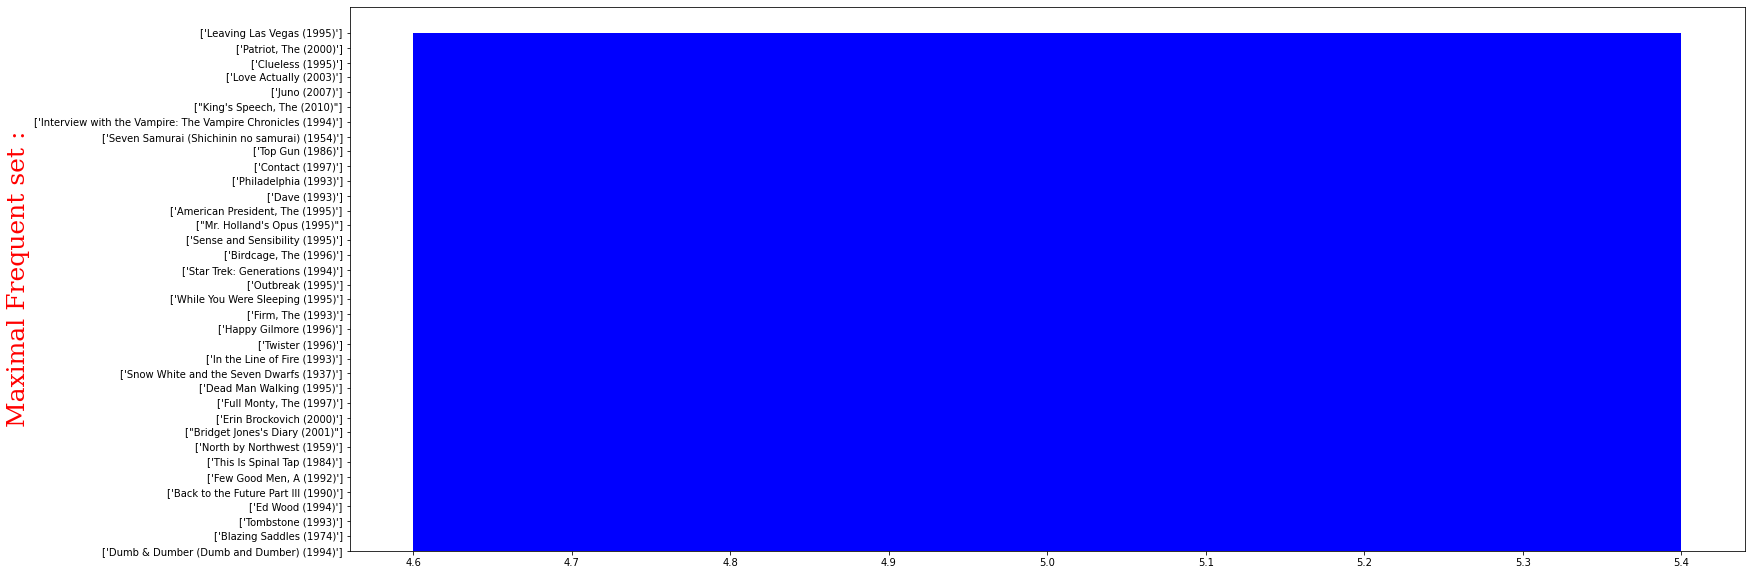

In [140]:

#visualization on the maximal frequent set
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25, 10))
plt.bar(length,f_Data,color="b")
font3 = {'family':'serif','color':'red','size':25}
#plt.title("Active Cases Gujrat",fontdict = font3)
#plt.xlabel("Date from 14 Mar 2020 to 14 June 2020 ",fontdict = font3)
plt.ylabel("Maximal Frequent set :",fontdict = font3)
plt.show()

# Using networkx library

In [160]:
f_Data[:4]

["['Dumb & Dumber (Dumb and Dumber) (1994)']",
 "['Blazing Saddles (1974)']",
 "['Tombstone (1993)']",
 "['Ed Wood (1994)']"]

In [161]:
import networkx as nx

In [172]:
my_G = nx.Graph()
a = 'Tombstone (1993)' #maximal frequent itemset 
b = 'Tombstone (1993),Titanic 2007'
c = 'Shrek (2001) Tombstone (1993)'
d = 'Jaws 1975 Tomstone (1993)'
my_G.add_nodes_from([(a,{"color":"green"}),(b,{"color":"grey"}),(c,{"color":"grey"}),(d,{"color":"grey"})])

In [173]:
my_G.add_edge(a, b)
my_G.add_edge(b, c)
my_G.add_edge(a, d)
my_G.add_edge(a, c)
my_G.add_edge(c, d)


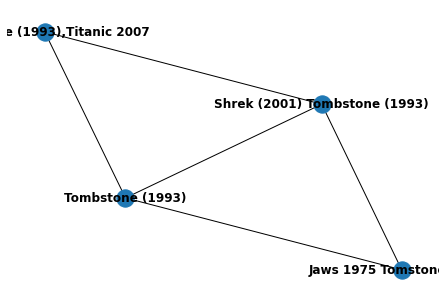

In [183]:
nx.draw(my_G, with_labels=True,font_weight="bold")

# Its a small example where we have Tombstone (1993) as the Maximal frequent set